## VAE Hawkes Process Estimation - Tutorial

### Preprocessing

In [10]:
import numpy as np
import pandas as pd
import Hawkes as hk
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


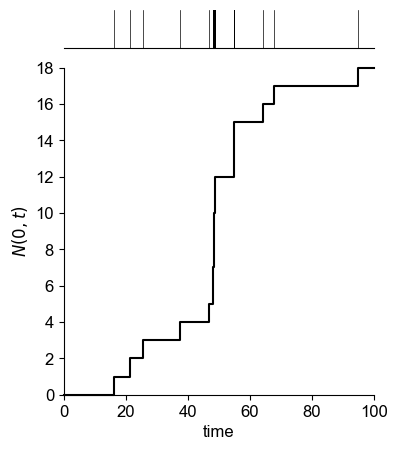

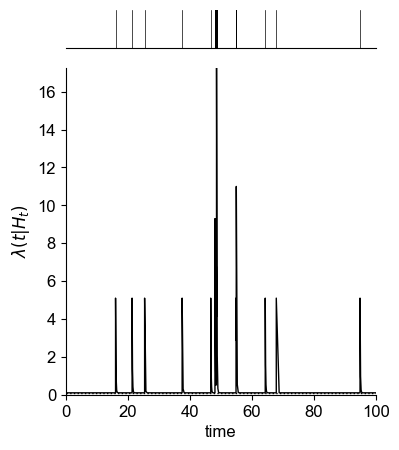

In [5]:
hawkes_data, T = hawkes_simulation()

In [58]:
def hawkes_estimation(T, kernel='exp', baseline='const', interval=[0,100], end_T=200, num_seq=100, filepath="C:/Users/Nicolas Girard/Documents/VAE_HAWKES_PROCESS_ESTIMATION/CODE/RESULTS/hawkes_estimation.csv"):
    
    hawkes_data = hk.estimator().set_kernel(kernel).set_baseline(baseline)
    hawkes_data.fit(T, interval)
    
    metrics = {'Event(s)': len(T),
               'Parameters': {k: round(v, 3) for k, v in hawkes_data.para.items()},
               'Branching Ratio': round(hawkes_data.br, 3),
               'Log-Likelihood': round(hawkes_data.L, 3),
               'AIC': round(hawkes_data.AIC, 3)}
    
    write_csv(metrics, filepath)

    [T_transform, interval_transform] = hawkes_data.t_trans() 
    hawkes_data.plot_KS()

    T_pred = hawkes_data.predict(end_T, num_seq) 
    hawkes_data.plot_N_pred()   
    
    return T_pred, metrics, T_transform, interval_transform

T_pred, metrics, T_transform, interval_transform = hawkes_estimation(T)

In [51]:
# CSV file writing function

def write_csv(data, filepath='', mode='w', encoding='utf-8'):
    
    try:
        if not isinstance(data, list):
            data = [data]

        # Write and field names initialisation
        with open(filepath, mode=mode, encoding=encoding) as file:
            file.write(','.join(data[0].keys()))
            file.write('\n')
        
            # Lines iteration
            for row in data:
                file.write(','.join(str(x) for x in row.values()))
                file.write('\n')
        
        # Close file properly    
        file.close()
                    
    except IOError as e:
        print(f"Cannot read the file: {e}.")